# Variable time integration 

In [2]:
from ldds.base import compute_lagrangian_descriptor, perturb_field, fit_pes
from ldds.tools import draw_all_lds

## Hamilton Saddle-Node

In [3]:
from ldds.vector_fields import HamSN1D

_Energy_

\begin{equation*}
H(x, p_x) = \frac{1}{2} p_x^2 + \frac{1}{2}x^2 + \frac{1}{3} x^3
\end{equation*}

_Vector field_

\begin{align*}
 \dot{x} &= \frac{\partial H}{\partial p_x} = f_1(x, p_x) = p_x \\
 \dot{p}_x &= -\frac{\partial H}{\partial x} = f_2(x, p_x) = - x - x^2
 \end{align*}

In [4]:
# Integration parameters
tau = 8

# Lp-norm, p-value
p_value = 1/2

# Mesh parameters
x_min,x_max = [-1.5, 1]
y_min,y_max = [-1, 1]
Nx, Ny = [300, 300]

# Box boundaries for Variable Time Integration
box_x_min, box_x_max = [-6, 6]

In [5]:
grid_parameters = [(x_min, x_max, Nx), (y_min, y_max, Ny)]
vector_field = HamSN1D
box_boundaries = [(box_x_min, box_x_max)]

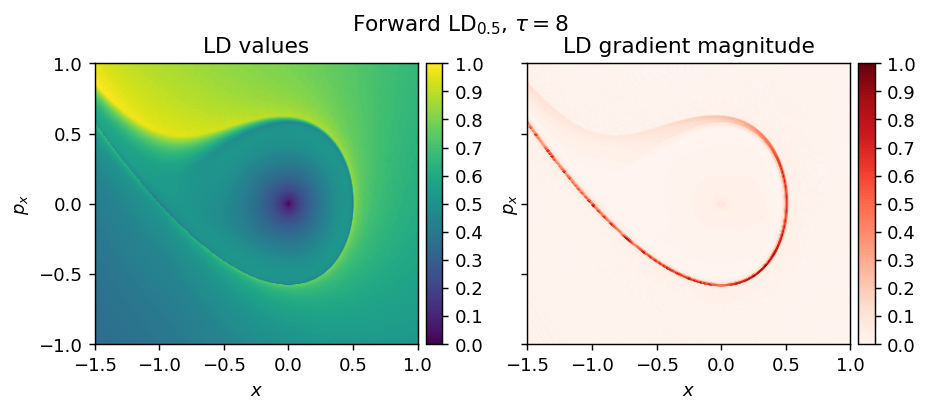

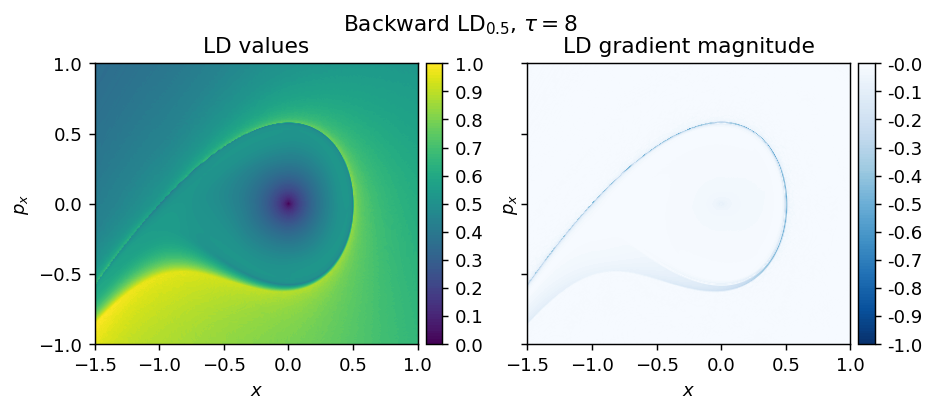

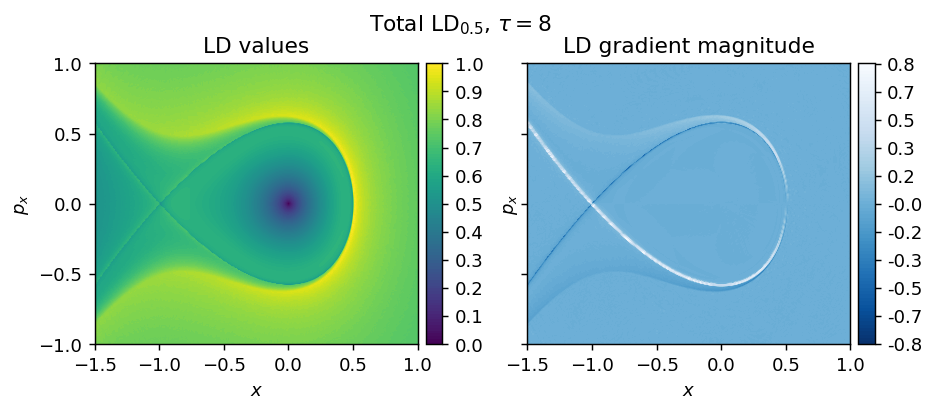

In [6]:
LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value, box_boundaries)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -tau, p_value, box_boundaries)

figs = draw_all_lds(LD_forward, LD_backward, grid_parameters, tau, p_value)

## Inverted Duffing oscillator

In [7]:
from ldds.vector_fields import Duffing1D

_Energy_

\begin{equation*}
H(x, p_x) = \frac{1}{2} p_x^2 + \frac{1}{2} x^2 - \frac{1}{4} x^4
\end{equation*}

_Vector field_

\begin{align*}
 \dot{x} &= \frac{\partial H}{\partial p_x} = f_1(x, p_x) = p_x \\
 \dot{p}_x &= -\frac{\partial H}{\partial x} = f_2(x, p_x) = -x + x^3
 \end{align*}

In [8]:
# Integration parameters
tau = 10

# Lp-norm, p-value
p_norm = 1/2

# Mesh parameters
x_min,x_max = [-1.5, 1.5]
y_min,y_max = [-1, 1]
Nx, Ny = [300, 300]

# Box boundaries for Variable Time Integration
box_x_min, box_x_max = [-6, 6]

In [9]:
grid_parameters = [(x_min, x_max, Nx), (y_min, y_max, Ny)]
alpha, beta = [-1, -1] 
vector_field = lambda t,u: Duffing1D(t, u, PARAMETERS = [alpha, beta])
box_boundaries = [(box_x_min, box_x_max)]

In [10]:
LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value, box_boundaries)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -tau, p_value, box_boundaries)

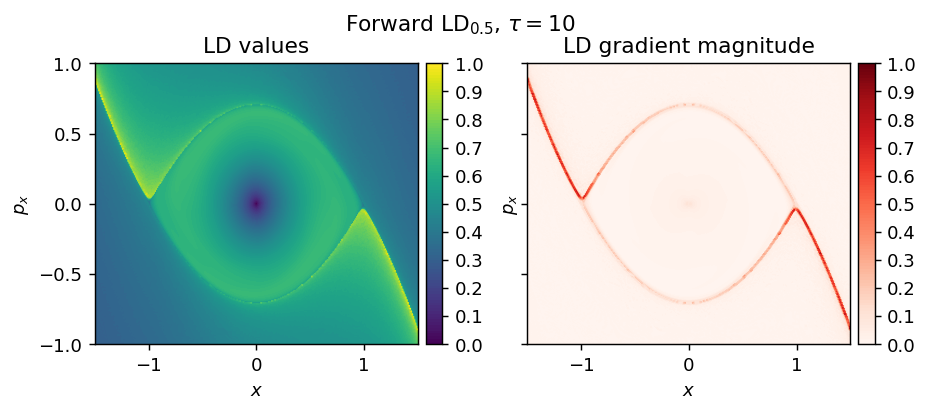

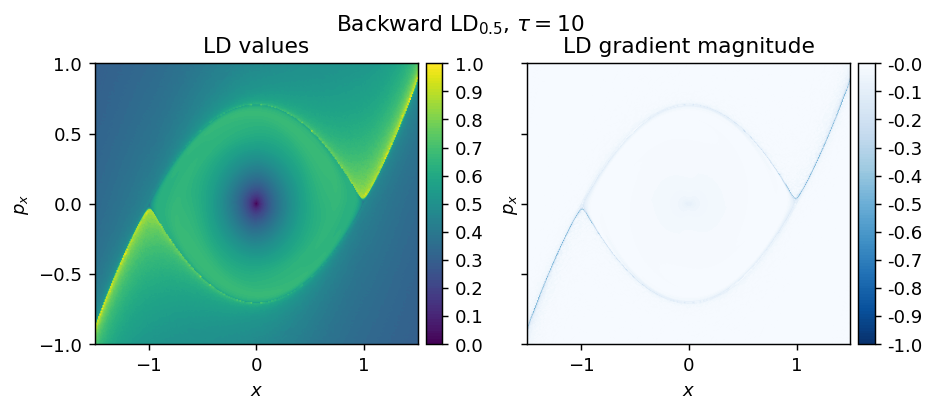

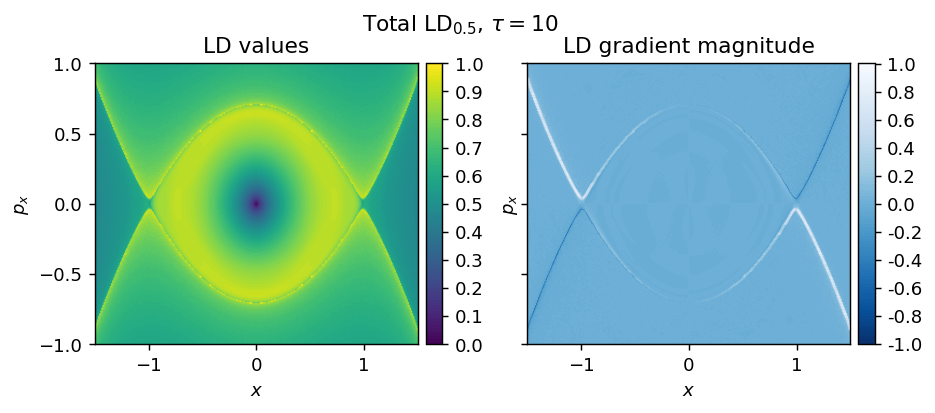

In [11]:
figs = draw_all_lds(LD_forward, LD_backward, grid_parameters, tau, p_value)